In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
# for data splitting, transforming and model training
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

%matplotlib inline


df = pd.read_csv('E:/Vaibhav/Lebron_James_Stats.csv')
df.head()

,Age,Team,Opponent,Position,Minutes Played,Field Goal,Field Goal Attempted,FG%,3P,3PA,...,Assists,Steals,Blocks,Turnover,Personal Fouls,Points,Game Score,+/-,Net_Points,Win/Loss
0,18,Cleveland Cavaliers,Sacramento Kings,Shooting Guard,42:50:00,12,20,0.600,0,2,...,9,4,0,2,3,25,24.7,-9.0,-14,0
1,18,Cleveland Cavaliers,Phoenix Suns,Shooting Guard,40:21:00,8,17,0.471,1,5,...,8,1,0,7,1,21,14.7,-3.0,-9,0
2,18,Cleveland Cavaliers,Portland Trail Blazers,Shooting Guard,39:10:00,3,12,0.250,0,1,...,6,2,0,2,3,8,5.0,-21.0,-19,0
3,18,Cleveland Cavaliers,Denver Nuggets,Shooting Guard,41:06:00,3,11,0.273,0,2,...,7,2,3,2,1,7,11.2,-3.0,-4,0
4,18,Cleveland Cavaliers,Indiana Pacers,Shooting Guard,43:44:00,8,18,0.444,1,2,...,3,0,0,7,2,23,9.0,-7.0,-1,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1421 non-null   int64  
 1   Team                   1421 non-null   object 
 2   Opponent               1421 non-null   object 
 3   Position               1421 non-null   object 
 4   Minutes Played         1421 non-null   object 
 5   Field Goal             1421 non-null   int64  
 6   Field Goal Attempted   1421 non-null   int64  
 7   FG%                    1421 non-null   float64
 8   3P                     1421 non-null   int64  
 9   3PA                    1421 non-null   int64  
 10  3P%                    1381 non-null   float64
 11  Free Throws            1421 non-null   int64  
 12  Free Throws Attempted  1421 non-null   int64  
 13  FT%                    1407 non-null   float64
 14  Offensive Rebounds     1421 non-null   int64  
 15  Defe

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1421.0,27.509500,5.619453,18.0,23.000,27.000,32.000,38.000
Field Goal,1421.0,9.959184,3.099936,0.0,8.000,10.000,12.000,23.000
Field Goal Attempted,1421.0,19.735398,4.780131,5.0,16.000,20.000,23.000,36.000
FG%,1421.0,0.505616,0.110395,0.0,0.435,0.500,0.579,0.929
3P,1421.0,1.591133,1.501044,0.0,0.000,1.000,2.000,9.000
3PA,1421.0,4.618578,2.572508,0.0,3.000,4.000,6.000,14.000
3P%,1381.0,0.312681,0.240515,0.0,0.125,0.333,0.500,1.000
Free Throws,1421.0,5.691063,3.368388,0.0,3.000,5.000,8.000,24.000
Free Throws Attempted,1421.0,7.741027,4.118038,0.0,5.000,7.000,10.000,28.000
FT%,1407.0,0.728970,0.192436,0.0,0.615,0.750,0.857,1.000


In [4]:
for col in df.select_dtypes('object').columns:
    print(col, '- # unique values:', df[col].nunique())

Team - # unique values: 3
Opponent - # unique values: 33
Position - # unique values: 4
Minutes Played - # unique values: 791


In [5]:
for col in df.select_dtypes('object').columns:
    print(col, '\n')
    print(df[col].value_counts(), '\n')

Team 

Team
Cleveland Cavaliers    849
Miami Heat             294
Los Angeles Lakers     278
Name: count, dtype: int64 

Opponent 

Opponent
Indiana Pacers                    64
Chicago Bulls                     62
Atlanta Hawks                     62
Milwaukee Bucks                   61
Detroit Pistons                   61
Orlando Magic                     60
Boston Celtics                    58
Toronto Raptors                   58
New York Knicks                   57
Washington Wizards                56
Philadelphia 76ers                54
Charlotte Hornets                 54
Miami Heat                        43
Memphis Grizzlies                 43
LA Clippers                       42
San Antonio Spurs                 41
Phoenix Suns                      40
Houston Rockets                   40
Denver Nuggets                    40
Portland Trail Blazers            40
Dallas Mavericks                  40
Minnesota Timberwolves            40
Utah Jazz                         39
Sacramen

In [6]:
df.columns

Index(['Age', 'Team', 'Opponent', 'Position', 'Minutes Played', 'Field Goal',
       'Field Goal Attempted', 'FG%', '3P', '3PA', '3P%', 'Free Throws',
       'Free Throws Attempted', 'FT%', 'Offensive Rebounds',
       'Defensive Rebound', 'Total Rebound', 'Assists', 'Steals', 'Blocks',
       'Turnover', 'Personal Fouls', 'Points', 'Game Score', '+/-',
       'Net_Points', 'Win/Loss'],
      dtype='object')

In [7]:
# Assuming df is your DataFrame containing categorical columns
categorical_summary = df.describe(include=['object'])
categorical_summary

,Team,Opponent,Position,Minutes Played
count,1421,1421,1421,1421
unique,3,33,4,791
top,Cleveland Cavaliers,Indiana Pacers,Small Forward,48:00:00
freq,849,64,1064,8


In [8]:
descriptive_stats_summary = df.describe(include=['int64','float64'])
descriptive_stats_summary

,Age,Field Goal,Field Goal Attempted,FG%,3P,3PA,3P%,Free Throws,Free Throws Attempted,FT%,...,Assists,Steals,Blocks,Turnover,Personal Fouls,Points,Game Score,+/-,Net_Points,Win/Loss
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1381.000000,1421.000000,1421.000000,1407.000000,...,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1420.000000,1421.000000,1421.000000
mean,27.509500,9.959184,19.735398,0.505616,1.591133,4.618578,0.312681,5.691063,7.741027,0.728970,...,7.332864,1.538353,0.755102,3.494722,1.832512,27.200563,22.242646,5.086620,4.087262,0.650246
std,5.619453,3.099936,4.780131,0.110395,1.501044,2.572508,0.240515,3.368388,4.118038,0.192436,...,2.962150,1.281823,0.898659,1.819536,1.278792,7.839582,7.742163,12.676835,13.024332,0.477060
min,18.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-0.100000,-39.000000,-42.000000,0.000000
25%,23.000000,8.000000,16.000000,0.435000,0.000000,3.000000,0.125000,3.000000,5.000000,0.615000,...,5.000000,1.000000,0.000000,2.000000,1.000000,22.000000,17.000000,-3.000000,-5.000000,0.000000
50%,27.000000,10.000000,20.000000,0.500000,1.000000,4.000000,0.333000,5.000000,7.000000,0.750000,...,7.000000,1.000000,1.000000,3.000000,2.000000,27.000000,22.500000,6.000000,5.000000,1.000000
75%,32.000000,12.000000,23.000000,0.579000,2.000000,6.000000,0.500000,8.000000,10.000000,0.857000,...,9.000000,2.000000,1.000000,5.000000,3.000000,32.000000,27.300000,14.000000,12.000000,1.000000
max,38.000000,23.000000,36.000000,0.929000,9.000000,14.000000,1.000000,24.000000,28.000000,1.000000,...,19.000000,7.000000,5.000000,11.000000,6.000000,61.000000,53.200000,39.000000,39.000000,1.000000


In [9]:
df['Minutes Played'] = df['Minutes Played'].str.split(':').str[0].astype(int)
df

,Age,Team,Opponent,Position,Minutes Played,Field Goal,Field Goal Attempted,FG%,3P,3PA,...,Assists,Steals,Blocks,Turnover,Personal Fouls,Points,Game Score,+/-,Net_Points,Win/Loss
0,18,Cleveland Cavaliers,Sacramento Kings,Shooting Guard,42,12,20,0.600,0,2,...,9,4,0,2,3,25,24.7,-9.0,-14,0
1,18,Cleveland Cavaliers,Phoenix Suns,Shooting Guard,40,8,17,0.471,1,5,...,8,1,0,7,1,21,14.7,-3.0,-9,0
2,18,Cleveland Cavaliers,Portland Trail Blazers,Shooting Guard,39,3,12,0.250,0,1,...,6,2,0,2,3,8,5.0,-21.0,-19,0
3,18,Cleveland Cavaliers,Denver Nuggets,Shooting Guard,41,3,11,0.273,0,2,...,7,2,3,2,1,7,11.2,-3.0,-4,0
4,18,Cleveland Cavaliers,Indiana Pacers,Shooting Guard,43,8,18,0.444,1,2,...,3,0,0,7,2,23,9.0,-7.0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,38,Los Angeles Lakers,Houston Rockets,Small Forward,29,8,18,0.444,1,7,...,11,0,1,1,1,18,19.4,23.0,25,1
1417,38,Los Angeles Lakers,Utah Jazz,Small Forward,38,14,27,0.519,3,10,...,6,1,1,5,2,37,25.3,-7.0,2,1
1418,38,Los Angeles Lakers,LA Clippers,Small Forward,35,13,20,0.650,4,6,...,7,1,1,6,0,33,26.4,-10.0,-7,0
1419,38,Los Angeles Lakers,Phoenix Suns,Small Forward,29,6,19,0.316,3,7,...,6,0,0,5,1,16,5.3,11.0,14,1


In [10]:
df.isnull().sum()

Age                       0
Team                      0
Opponent                  0
Position                  0
Minutes Played            0
Field Goal                0
Field Goal Attempted      0
FG%                       0
3P                        0
3PA                       0
3P%                      40
Free Throws               0
Free Throws Attempted     0
FT%                      14
Offensive Rebounds        0
Defensive Rebound         0
Total Rebound             0
Assists                   0
Steals                    0
Blocks                    0
Turnover                  0
Personal Fouls            0
Points                    0
Game Score                0
+/-                       1
Net_Points                0
Win/Loss                  0
dtype: int64

In [11]:
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)
df

,Age,Team,Opponent,Position,Minutes Played,Field Goal,Field Goal Attempted,FG%,3P,3PA,...,Assists,Steals,Blocks,Turnover,Personal Fouls,Points,Game Score,+/-,Net_Points,Win/Loss
0,18,Cleveland Cavaliers,Sacramento Kings,Shooting Guard,42,12,20,0.600,0,2,...,9,4,0,2,3,25,24.7,-9.0,-14,0
1,18,Cleveland Cavaliers,Phoenix Suns,Shooting Guard,40,8,17,0.471,1,5,...,8,1,0,7,1,21,14.7,-3.0,-9,0
2,18,Cleveland Cavaliers,Portland Trail Blazers,Shooting Guard,39,3,12,0.250,0,1,...,6,2,0,2,3,8,5.0,-21.0,-19,0
3,18,Cleveland Cavaliers,Denver Nuggets,Shooting Guard,41,3,11,0.273,0,2,...,7,2,3,2,1,7,11.2,-3.0,-4,0
4,18,Cleveland Cavaliers,Indiana Pacers,Shooting Guard,43,8,18,0.444,1,2,...,3,0,0,7,2,23,9.0,-7.0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,38,Los Angeles Lakers,Houston Rockets,Small Forward,29,8,18,0.444,1,7,...,11,0,1,1,1,18,19.4,23.0,25,1
1417,38,Los Angeles Lakers,Utah Jazz,Small Forward,38,14,27,0.519,3,10,...,6,1,1,5,2,37,25.3,-7.0,2,1
1418,38,Los Angeles Lakers,LA Clippers,Small Forward,35,13,20,0.650,4,6,...,7,1,1,6,0,33,26.4,-10.0,-7,0
1419,38,Los Angeles Lakers,Phoenix Suns,Small Forward,29,6,19,0.316,3,7,...,6,0,0,5,1,16,5.3,11.0,14,1


C:\Users\VAIBHAV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


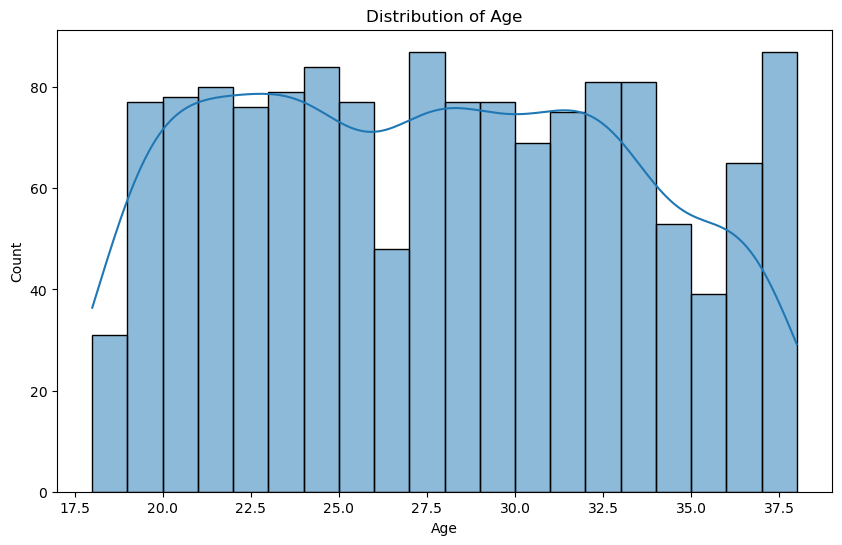

In [12]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.show()

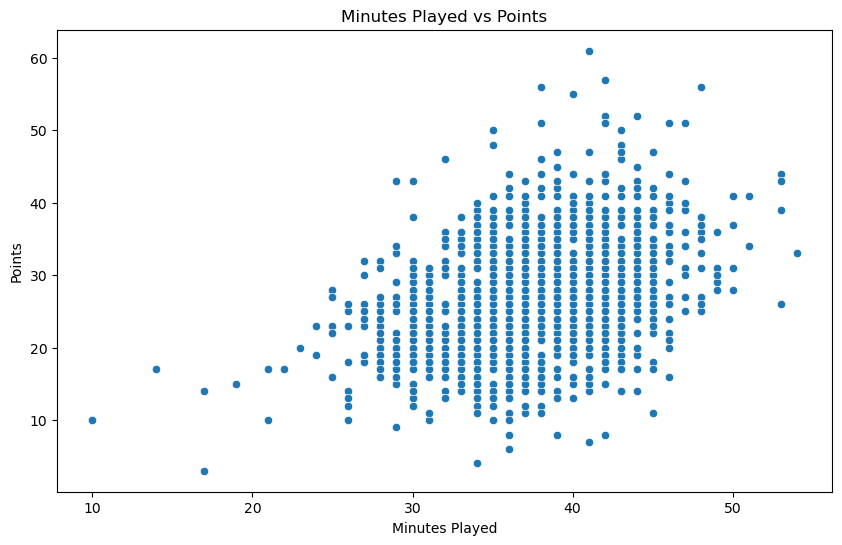

In [13]:
# Convert Minutes Played to numeric (if not already done)
# Scatter plot of Minutes Played vs Points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Minutes Played', y='Points', data=df)
plt.title('Minutes Played vs Points')
plt.show()


In [14]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



ValueError: could not convert string to float: 'Cleveland Cavaliers'

<Figure size 1400x1000 with 0 Axes>

In [ ]:
# Count plot of Win/Loss
plt.figure(figsize=(8, 6))
sns.countplot(x='Win/Loss', data=df)
plt.title('Win/Loss Distribution')
plt.show()


In [ ]:
df = pd.get_dummies(df, columns=['Position','Team', 'Opponent']).astype(int)
df

In [ ]:
sns.heatmap(descriptive_stats_summary.corr())

In [ ]:
# segregating dataset into features i.e., X and target variables i.e., y
X = df.drop(['Win/Loss'],axis=1)
y = df['Win/Loss']

In [ ]:
X

In [ ]:
y

In [ ]:
X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Win/Loss", fontsize = 15,
        rot = 90, grid = True)

In [ ]:
# Calculate correlations between features and the response variable
correlation = X.corrwith(y)

# Plot correlations as a bar plot
plt.figure(figsize=(16, 4))
correlation.plot(kind='bar', title="Correlation", fontsize=15, rot=90, grid=True)

# Annotate the bars with percentage values
for i, value in enumerate(correlation):
    plt.text(i, value, f"{value:.2f}%", ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=42)

In [ ]:
## checking distribution of traget variable in train test split
print('Distribution of heart_disease variable in training set')
print(y_train.value_counts())

print('Distribution of heart_disease variable in test set')
print(y_test.value_counts())

In [ ]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

In [ ]:
df

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create StandardScaler object
scaler = StandardScaler()
# Assuming X_train is your DataFrame

# Select numerical columns to scale
columns_to_scale = X_train.select_dtypes(include=['int32']).columns

# Fit and transform the scaler on the training data
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Display the scaled DataFrame
print(X_train.head())

In [ ]:
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Display the scaled testing DataFrame (optional)
print(X_test.head())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = logreg.predict(X_train)

# Compute training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the testing set
y_test_pred = logreg.predict(X_test)

# Compute testing accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Print the training and testing accuracies
print(f"Training Accuracy: {training_accuracy:.2f}")
print(f"Testing Accuracy: {testing_accuracy:.2f}")


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# Create KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn.predict(X_test)

# Evaluate the model's performance
accuracy_knn = knn.score(X_test, y_test)
print("KNeighborsClassifier Accuracy: {:.2f}".format(accuracy_knn))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create RandomForestClassifier model
rf = RandomForestClassifier(criterion='entropy',n_estimators=100)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf.predict(X_test)

# Evaluate the model's performance
accuracy_rf = rf.score(X_test, y_test)
print("RandomForestClassifier Accuracy: {:.2f}".format(accuracy_rf))

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def train_and_evaluate_xgb_model(X_train, y_train, X_test, y_test):
    # Create XGBoost classifier
    xgb = XGBClassifier()

    # Fit the model to the training data
    xgb.fit(X_train, y_train)

    # Make predictions on the training set
    y_train_pred = xgb.predict(X_train)

    # Compute training accuracy
    training_accuracy = accuracy_score(y_train, y_train_pred)

    # Make predictions on the testing set
    y_test_pred = xgb.predict(X_test)

    # Compute testing accuracy
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    # Print the training and testing accuracies
    print(f"Training Accuracy: {training_accuracy:.2f}")
    print(f"Testing Accuracy: {testing_accuracy:.2f}")

# Example usage
train_and_evaluate_xgb_model(X_train, y_train, X_test, y_test)



In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create RandomForestClassifier model
rf_classifier = RandomForestClassifier()

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the training data
y_train_pred = rf_classifier.predict(X_train)

# Predict on the testing data
y_test_pred = rf_classifier.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy * 100)
print("Testing Accuracy:", test_accuracy * 100)

# Plot confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Training Data\nAccuracy: {train_accuracy*100:.2f}%')
plt.show()

# Plot confusion matrix for testing data
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Testing Data\nAccuracy: {test_accuracy*100:.2f}%')
plt.show()


from sklearn.metrics import classification_report

# Generate classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Generate classification report for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_test_pred))



In [ ]:
# Get the coefficients and index them by feature names
coefficients = logreg.coef_[0]
feat_importances = pd.Series(coefficients, index=X_train.columns)

# Plot the top 20 most important features
plt.figure(figsize=(10, 8))
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Coefficient Magnitude')
plt.title('Top Most Important Features (Logistic Regression)')
plt.show()